In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_excel(r'default_of_credit_card_clients_0.xlsx')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,0,0,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,0,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
df.shape

(30000, 25)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [8]:
df.rename(columns= {'BILL_AMT1': 'SEP_BILL','BILL_AMT2': 'AUG_BILL','BILL_AMT3': 'JUL_BILL','BILL_AMT4': 'JUN_BILL',
                   'BILL_AMT5': 'MAY_BILL','BILL_AMT6': 'APR_BILL'}, inplace = True)

In [21]:
df.rename(columns= {'PAY_AMT1': 'SEP_PAY','PAY_AMT2': 'AUG_PAY','PAY_AMT3': 'JUL_PAY','PAY_AMT4': 'JUN_PAY',
                   'PAY_AMT5': 'MAY_PAY','PAY_AMT6': 'APR_PAY'}, inplace = True)

In [24]:
df.rename(columns= {'default payment next month' : 'def_pay'}, inplace = True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_0      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  SEP_BILL   30000 non-null  int64
 13  AUG_BILL   30000 non-null  int64
 14  JUL_BILL   30000 non-null  int64
 15  JUN_BILL   30000 non-null  int64
 16  MAY_BILL   30000 non-null  int64
 17  APR_BILL   30000 non-null  int64
 18  SEP_PAY    30000 non-null  int64
 19  AUG_PAY    30000 non-null  int64
 20  JUL_PAY    30000 non-null  int64
 21  JUN_PAY    3

In [26]:
df1 = df.copy()

In [27]:
bins = [20,30,40,50,60,70,80]
labels = ['20-30','30-40','40-50','50-60','60-70','70-80']
df1['age_grp']= pd.cut(df1['AGE'], bins= bins, labels= labels)

In [28]:
df1.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,MAY_BILL,APR_BILL,SEP_PAY,AUG_PAY,JUL_PAY,JUN_PAY,MAY_PAY,APR_PAY,def_pay,age_grp
0,1,20000,2,2,1,24,2,2,0,0,...,0,0,0,689,0,0,0,0,1,20-30
1,2,120000,2,2,2,26,0,2,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,20-30
2,3,90000,2,2,2,34,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,30-40
3,4,50000,2,2,1,37,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,30-40
4,5,50000,1,2,1,57,0,0,0,0,...,19146,19131,2000,36681,10000,9000,689,679,0,50-60


In [29]:
df1.rename(columns= {'default payment next month' : 'def_pay'}, inplace = True)

In [44]:
df1['EDUCATION'].replace(0,4,inplace=True)
df1['EDUCATION'].replace(5,4,inplace=True)
df1['EDUCATION'].replace(6,4,inplace=True)

In [46]:
df1['MARRIAGE'].replace(0,3,inplace=True)

In [48]:
df1.replace({'MARRIAGE' : {1 : 'Married',2:'Single', 3 : 'Others'},
            'SEX' : {1: 'Male', 2 : 'Female'},
            'EDUCATION' : {1 : 'Graduate', 2 : 'University', 3:'High_School',4 : 'Others'}}, inplace= True)

In [50]:
pay_cust = df1[df1['def_pay'] ==  0]
non_pay_cust = df1[df1['def_pay'] ==  1]

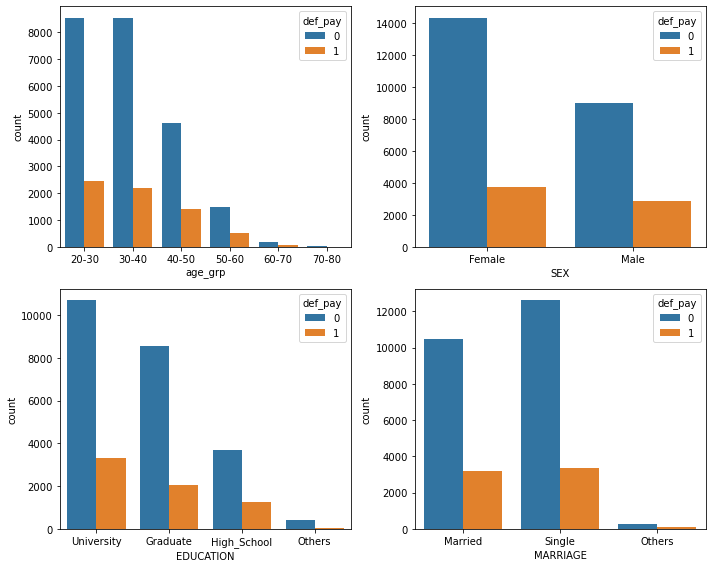

In [49]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
A = sns.countplot(x = df1['age_grp'] ,hue= df1['def_pay'])

plt.subplot(2,2,2)
B=sns.countplot(x = df1['SEX'] ,hue= df1['def_pay'])


plt.subplot(2,2,3)
C =sns.countplot(x = df1['EDUCATION'] ,hue= df1['def_pay'])

plt.subplot(2,2,4)
C =sns.countplot(x = df1['MARRIAGE'] ,hue= df1['def_pay'])

plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='SEX', ylabel='count'>

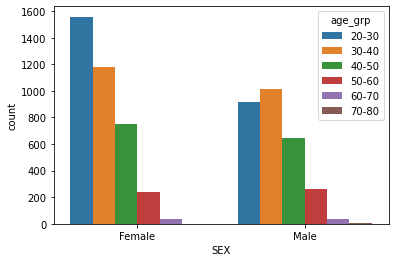

In [57]:
sns.countplot(x = non_pay_cust['SEX'], hue = non_pay_cust['age_grp'])

<AxesSubplot:xlabel='SEX', ylabel='count'>

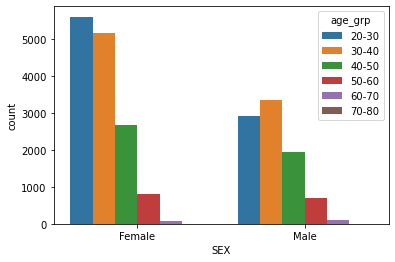

In [147]:
sns.countplot(x = pay_cust['SEX'], hue = pay_cust['age_grp'])

In [72]:
df1.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,MAY_BILL,APR_BILL,SEP_PAY,AUG_PAY,JUL_PAY,JUN_PAY,MAY_PAY,APR_PAY,def_pay,age_grp
0,1,20000,Female,University,Married,24,2,2,0,0,...,0,0,0,689,0,0,0,0,1,20-30
1,2,120000,Female,University,Single,26,0,2,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,20-30
2,3,90000,Female,University,Single,34,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,30-40
3,4,50000,Female,University,Married,37,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,30-40
4,5,50000,Male,University,Married,57,0,0,0,0,...,19146,19131,2000,36681,10000,9000,689,679,0,50-60


In [74]:
c = non_pay_cust.groupby(['MAY_BILL'])['SEX']
c.head()

0        Female
1        Female
13         Male
16         Male
21       Female
          ...  
29982      Male
29994      Male
29997      Male
29998      Male
29999      Male
Name: SEX, Length: 5549, dtype: object

In [103]:
data = df1.iloc[:,12:18]
data.head()

,SEP_BILL,AUG_BILL,JUL_BILL,JUN_BILL,MAY_BILL,APR_BILL
0,3913,3102,689,0,0,0
1,2682,1725,2682,3272,3455,3261
2,29239,14027,13559,14331,14948,15549
3,46990,48233,49291,28314,28959,29547
4,8617,5670,35835,20940,19146,19131


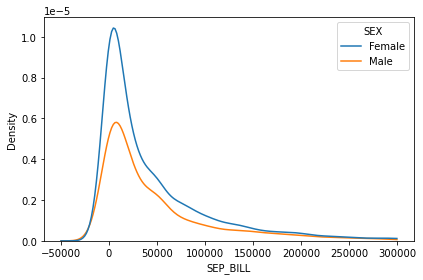

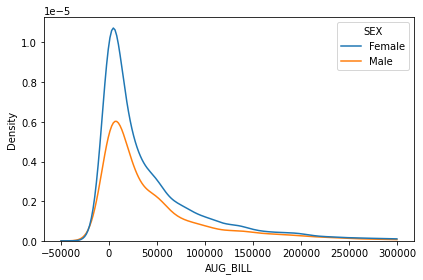

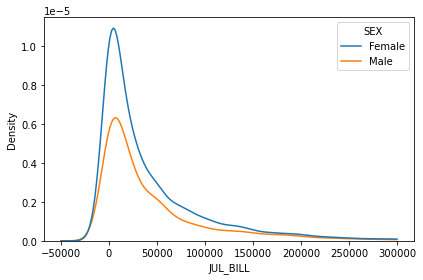

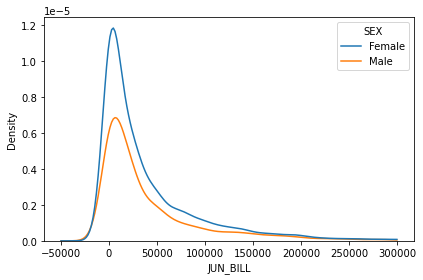

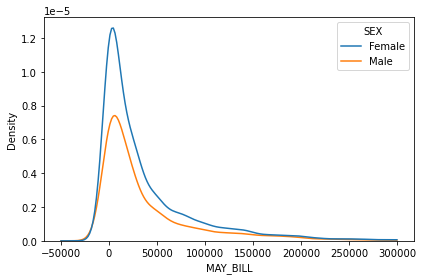

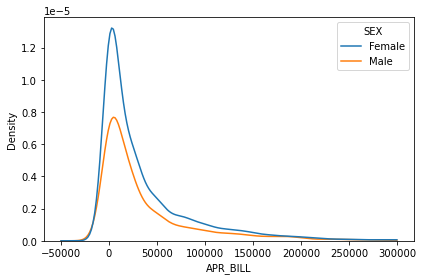

In [111]:
for i in data :
    sns.kdeplot(data[i], hue= df1['SEX'],clip = (-50000, 300000))
    plt.tight_layout()
    plt.show()

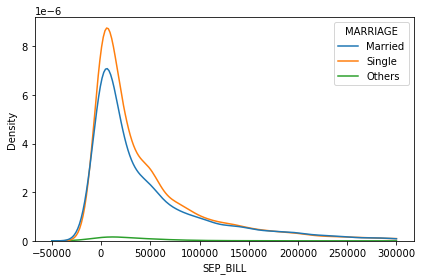

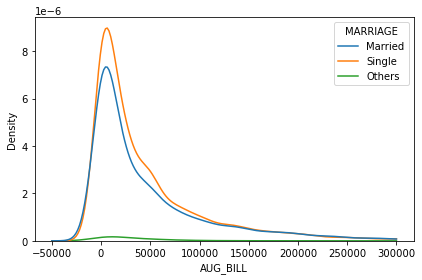

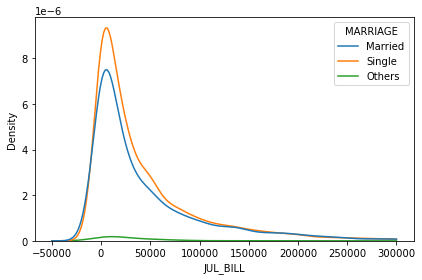

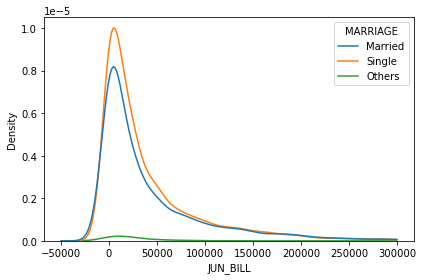

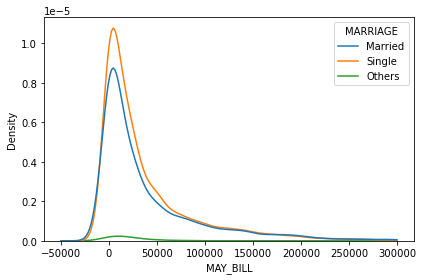

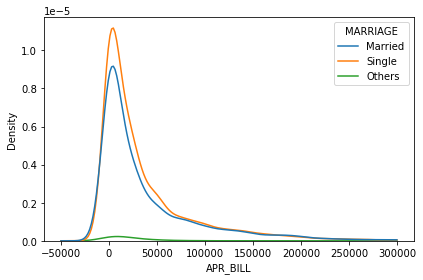

In [112]:
for i in data :
    sns.kdeplot(data[i], hue= df1['MARRIAGE'],clip = (-50000, 300000))
    plt.tight_layout()
    plt.show()

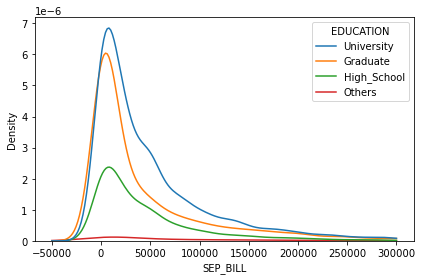

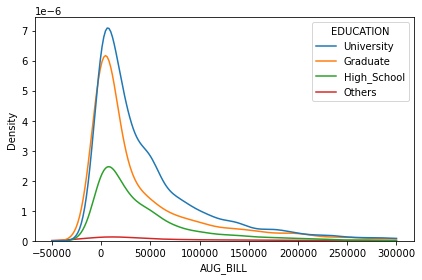

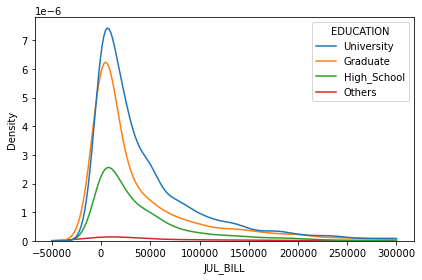

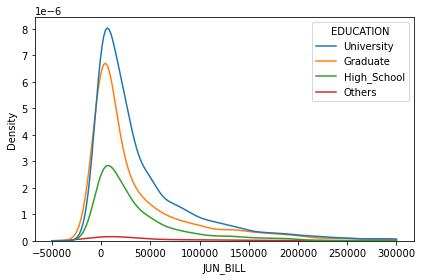

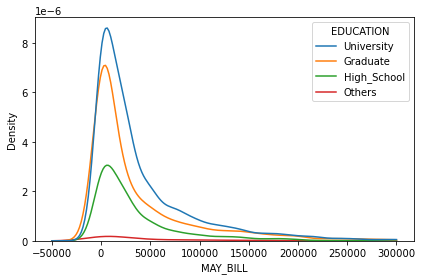

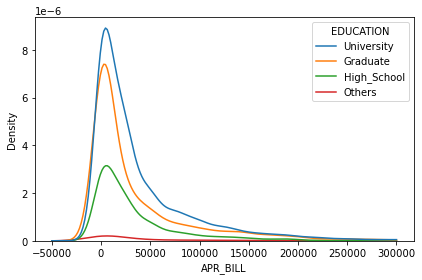

In [122]:
for i in data :
    plt.subplot(111)
    sns.kdeplot(data[i], hue= df1['EDUCATION'],clip = (-50000, 300000))
    plt.tight_layout()
    plt.show()

In [125]:
d1 = non_pay_cust.iloc[:,6:12]

In [145]:
d2 = pay_cust.iloc[:,6:12]

In [135]:
import warnings
warnings.filterwarnings("ignore")

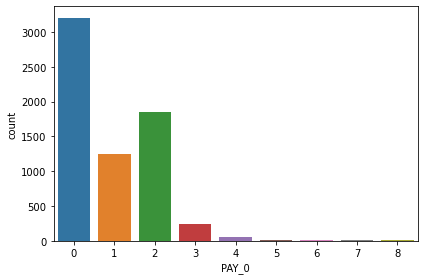

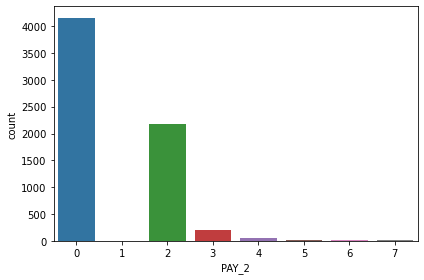

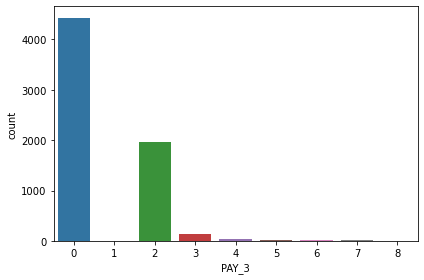

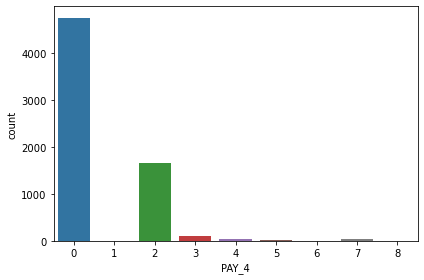

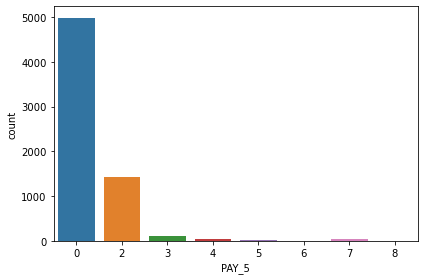

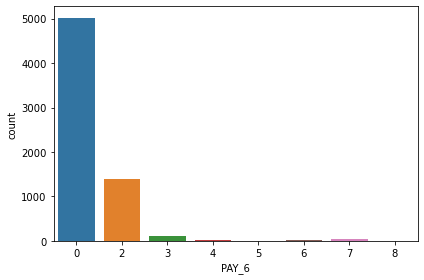

In [136]:
for i in d1 :
    plt.subplot(111)
    sns.countplot(d1[i])
    plt.tight_layout()
    plt.show()

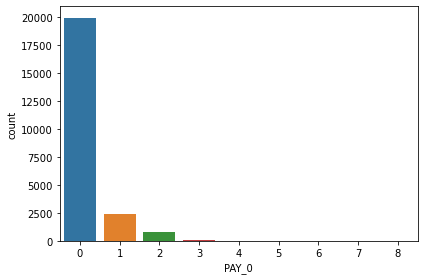

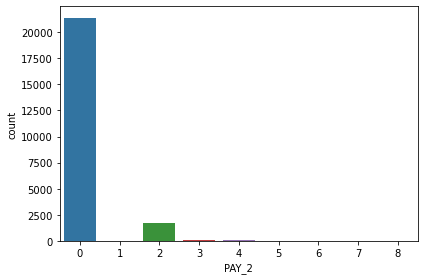

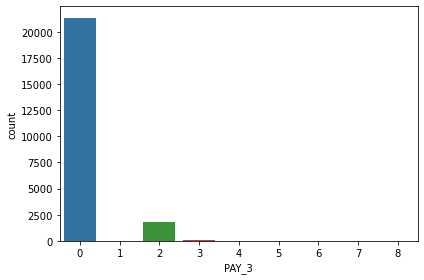

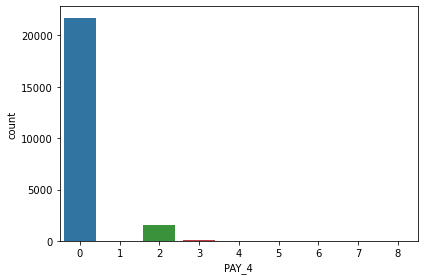

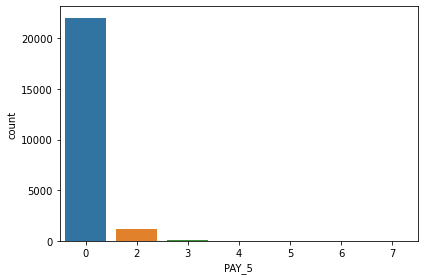

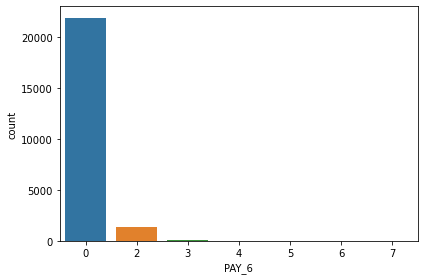

In [146]:
for i in d2 :
    plt.subplot(111)
    sns.countplot(d2[i])
    plt.tight_layout()
    plt.show()

In [137]:
non_pay_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6636 entries, 0 to 29999
Data columns (total 26 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   ID         6636 non-null   int64   
 1   LIMIT_BAL  6636 non-null   int64   
 2   SEX        6636 non-null   object  
 3   EDUCATION  6636 non-null   object  
 4   MARRIAGE   6636 non-null   object  
 5   AGE        6636 non-null   int64   
 6   PAY_0      6636 non-null   int64   
 7   PAY_2      6636 non-null   int64   
 8   PAY_3      6636 non-null   int64   
 9   PAY_4      6636 non-null   int64   
 10  PAY_5      6636 non-null   int64   
 11  PAY_6      6636 non-null   int64   
 12  SEP_BILL   6636 non-null   int64   
 13  AUG_BILL   6636 non-null   int64   
 14  JUL_BILL   6636 non-null   int64   
 15  JUN_BILL   6636 non-null   int64   
 16  MAY_BILL   6636 non-null   int64   
 17  APR_BILL   6636 non-null   int64   
 18  SEP_PAY    6636 non-null   int64   
 19  AUG_PAY    6636 non-null  

In [138]:
Non_pay_bill = non_pay_cust.iloc[:,12:18]

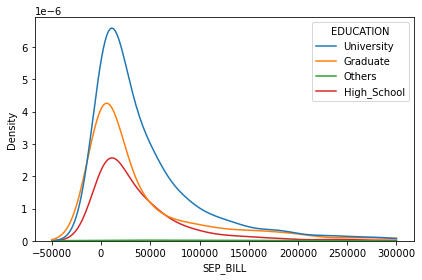

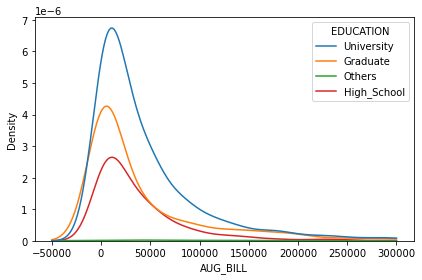

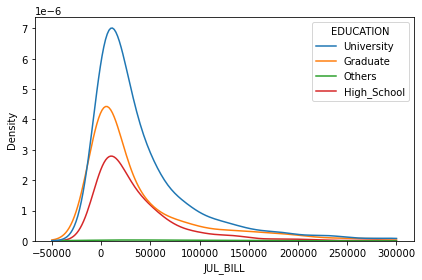

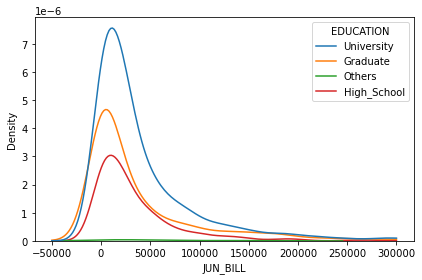

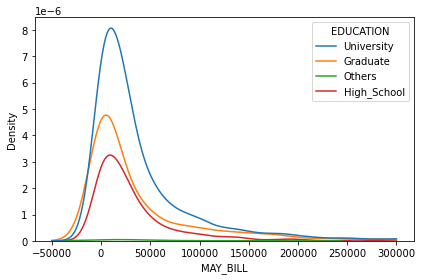

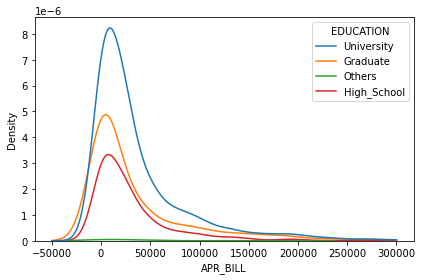

In [143]:
for i in Non_pay_bill :
    plt.subplot(111)
    sns.kdeplot(Non_pay_bill[i], hue= non_pay_cust['EDUCATION'],clip = (-50000, 300000))
    plt.tight_layout()
    plt.show()

In [140]:
pay_bill = pay_cust.iloc[:,12:18]

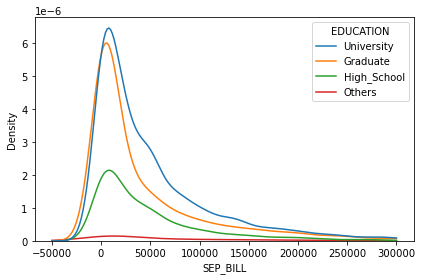

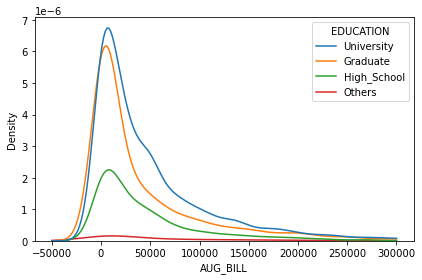

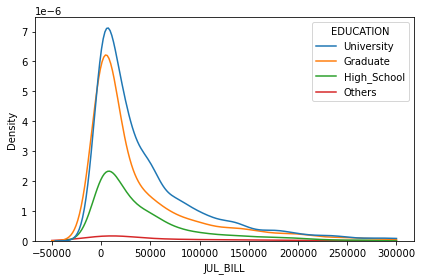

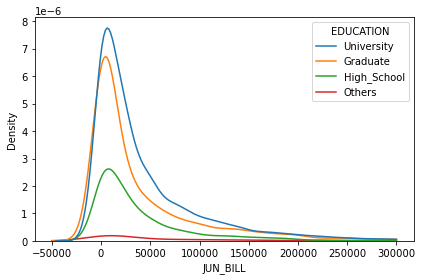

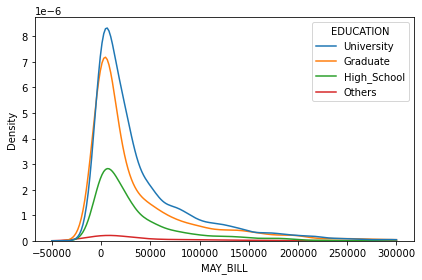

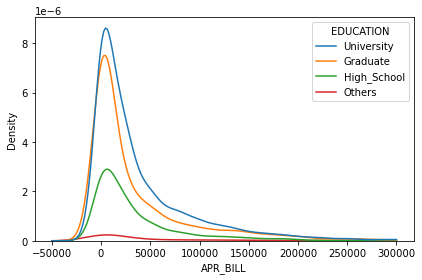

In [144]:
for i in pay_bill :
    plt.subplot(111)
    sns.kdeplot(pay_bill[i], hue= pay_cust['EDUCATION'],clip = (-50000, 300000))
    plt.tight_layout()
    plt.show()

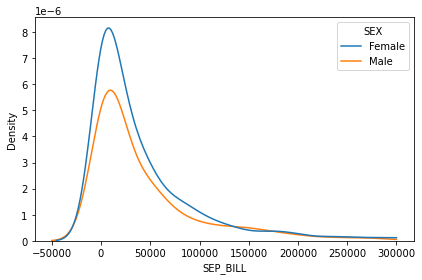

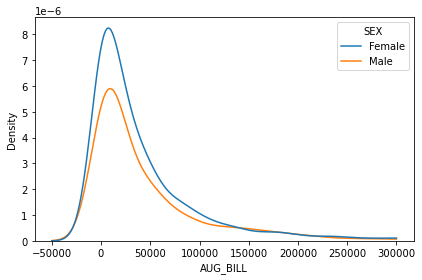

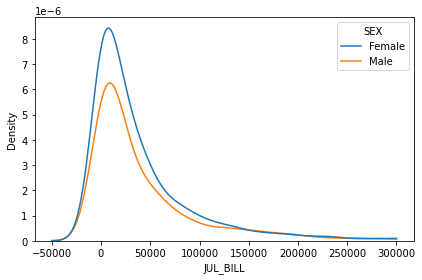

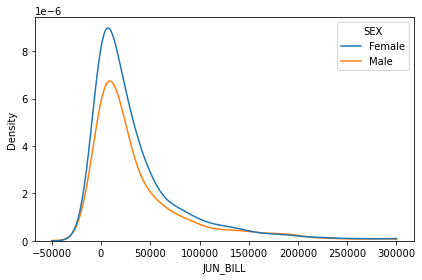

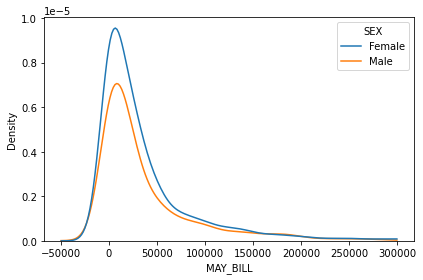

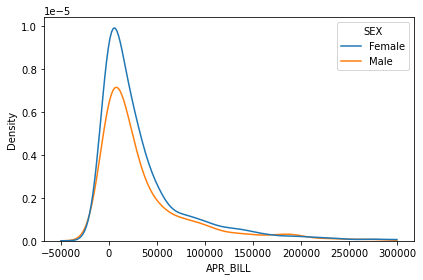

In [153]:
for i in pay_bill :
    plt.subplot(111)
    sns.kdeplot(Non_pay_bill[i], hue= non_pay_cust['SEX'],clip = (-50000, 300000))
    plt.tight_layout()
    plt.show()

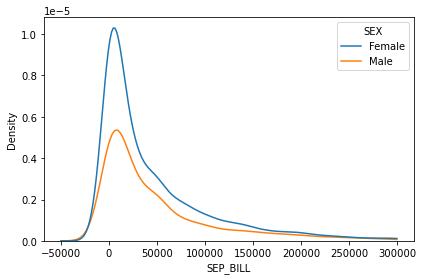

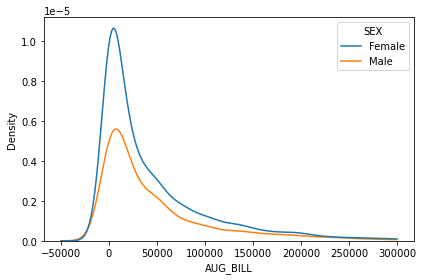

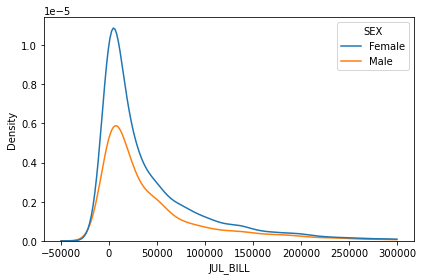

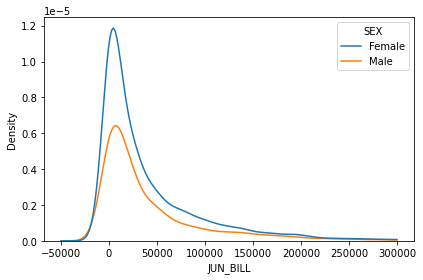

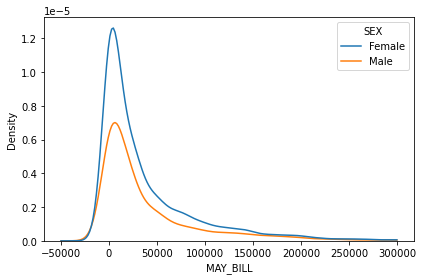

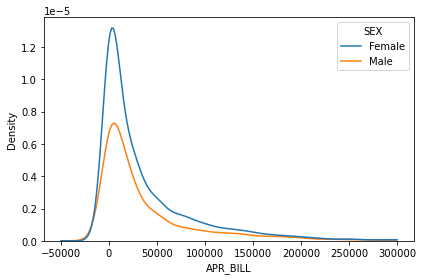

In [142]:
for i in pay_bill :
    plt.subplot(111)
    sns.kdeplot(pay_bill[i], hue= pay_cust['SEX'],clip = (-50000, 300000))
    plt.tight_layout()
    plt.show()